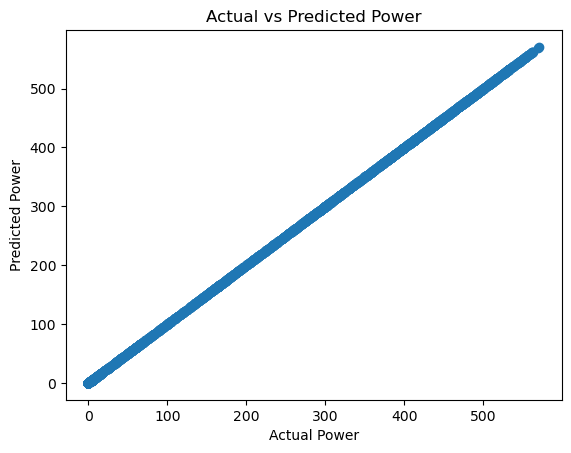

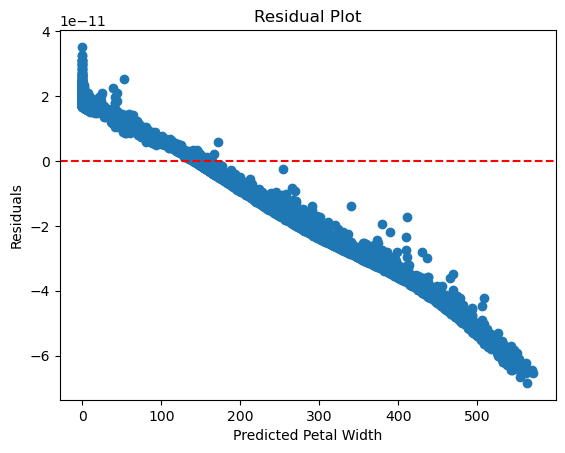

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df=pd.read_excel('mlpaper.xlsx')

X = df.drop(columns = ['power'])

y = df['power']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.15,random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

from sklearn.linear_model import LinearRegression
lin = LinearRegression()

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=6)
X_poly_train = poly.fit_transform(X_train_scaler)
X_test_poly = poly.transform(X_test_scaler)
poly.fit(X_poly_train,y_train)
lin.fit(X_poly_train,y_train)

y_pred = lin.predict(X_test_poly)
y_pred_train = lin.predict(X_poly_train)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Power')
plt.ylabel('Predicted Power')
plt.title('Actual vs Predicted Power')
plt.show()

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Petal Width')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()